# Vodafone Customer Attrition Predictor

### `Business Understanding`


#### **Problem Statement:** Vodafone is facing a growing challenge with customer attrition. This rising churn rate poses a threat to the company's operational efficiency and future growth. 

#### **Project Goal:** The aim of the project is to to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#### **Stakeholders:** 
 - Vodafone
 - Business Team
 - Marketing Team


#### **Key Metrics and Success Criteria**
 - The model should have an accuracy score of 85%(on balanced data)
 - Good models are expected to have an F1 score of > 0.80 or 80%
 - There should be atleast 4 Baseline models
 - All hyperparameter tuning should only be applied to baseline models if they exceed their F1 score
 - An ROC Curver of 80% is ideal for the model to generalize 



#### **Features**
- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)




##### **Null Hypothesis:** The monthly subscription cost (MonthlyCharges) has no significant effect on customer churn (Churn) from the Vodafone network service.


##### **Alternate Hypothesis:** The monthly subscription cost (MonthlyCharges) has a significant effect on customer churn (Churn) from the Vodafone network service.



##### **Analytical Questions:**
1. Which customer demographics are most strongly associated with churn, and how do factors like age, gender, and senior citizenship status influence churn rates?

2. How does the duration of customer tenure influence the likelihood of churn, and is there a specific tenure period during which customers are more likely to leave?

3. What is the impact of different service types (e.g., DSL, Fiber Optic, no internet service) on customer churn, and which services are most closely associated with higher churn rates?

4. How do contract terms (e.g., month-to-month, one-year, two-year) and billing preferences (e.g., paperless billing) affect customer churn rates?

5. What role do additional services (e.g., online security, tech support, streaming TV, streaming movies) play in influencing customer churn, and which of these services are most effective in retaining customers?






### `DATA UNDERSTANDING`

### **Importations**

In [1]:
# Data Manipulation packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Correlation
import phik


# Hypothesis testing
import scipy.stats as stats

#Impute
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline


# Model interpretability
from lime.lime_tabular import LimeTabularExplainer

# Machine Learning Packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder , RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import auc, roc_curve




### **Importation to Connect to Server**

In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import warnings 

warnings.filterwarnings('ignore')

### **Load Dataset**

In [3]:
# Connecting to the Dataset
df_second = pd.read_csv('..\\data\\LP2_Telco-churn-second-2000.csv')

df_last = pd.read_excel('..\\data\\Telco-churn-last-2000.xlsx')


# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")


# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


# Establish the connection

connection = pyodbc.connect(connection_string)

#### **Inspecting Columns In Csv**

In [4]:
df_second.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [5]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Inspecting Columns In Database**

In [6]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

df_first = pd.read_sql(query, connection)

df_first.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### **Inspecting Columns In Excel**

In [8]:
df_last.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [10]:
# Check the number of columns and rows in each data
df_first.shape, df_second.shape, df_last.shape

((3000, 21), (2043, 21), (2000, 20))

In [11]:
# Define a function to check and visualize missing values
# Define a function to check and visualize missing values
def check_missing_values(df):
    """
    Check for missing values in the DataFrame and visualize it using missingno.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    # Check for missing values in the DataFrame
    missing_values = df.isnull().sum()

    print("Missing values in the DataFrame:")
    print(missing_values)

    # Visualize missing values using missingno matrix
    msno.matrix(df)

Missing values in the DataFrame:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


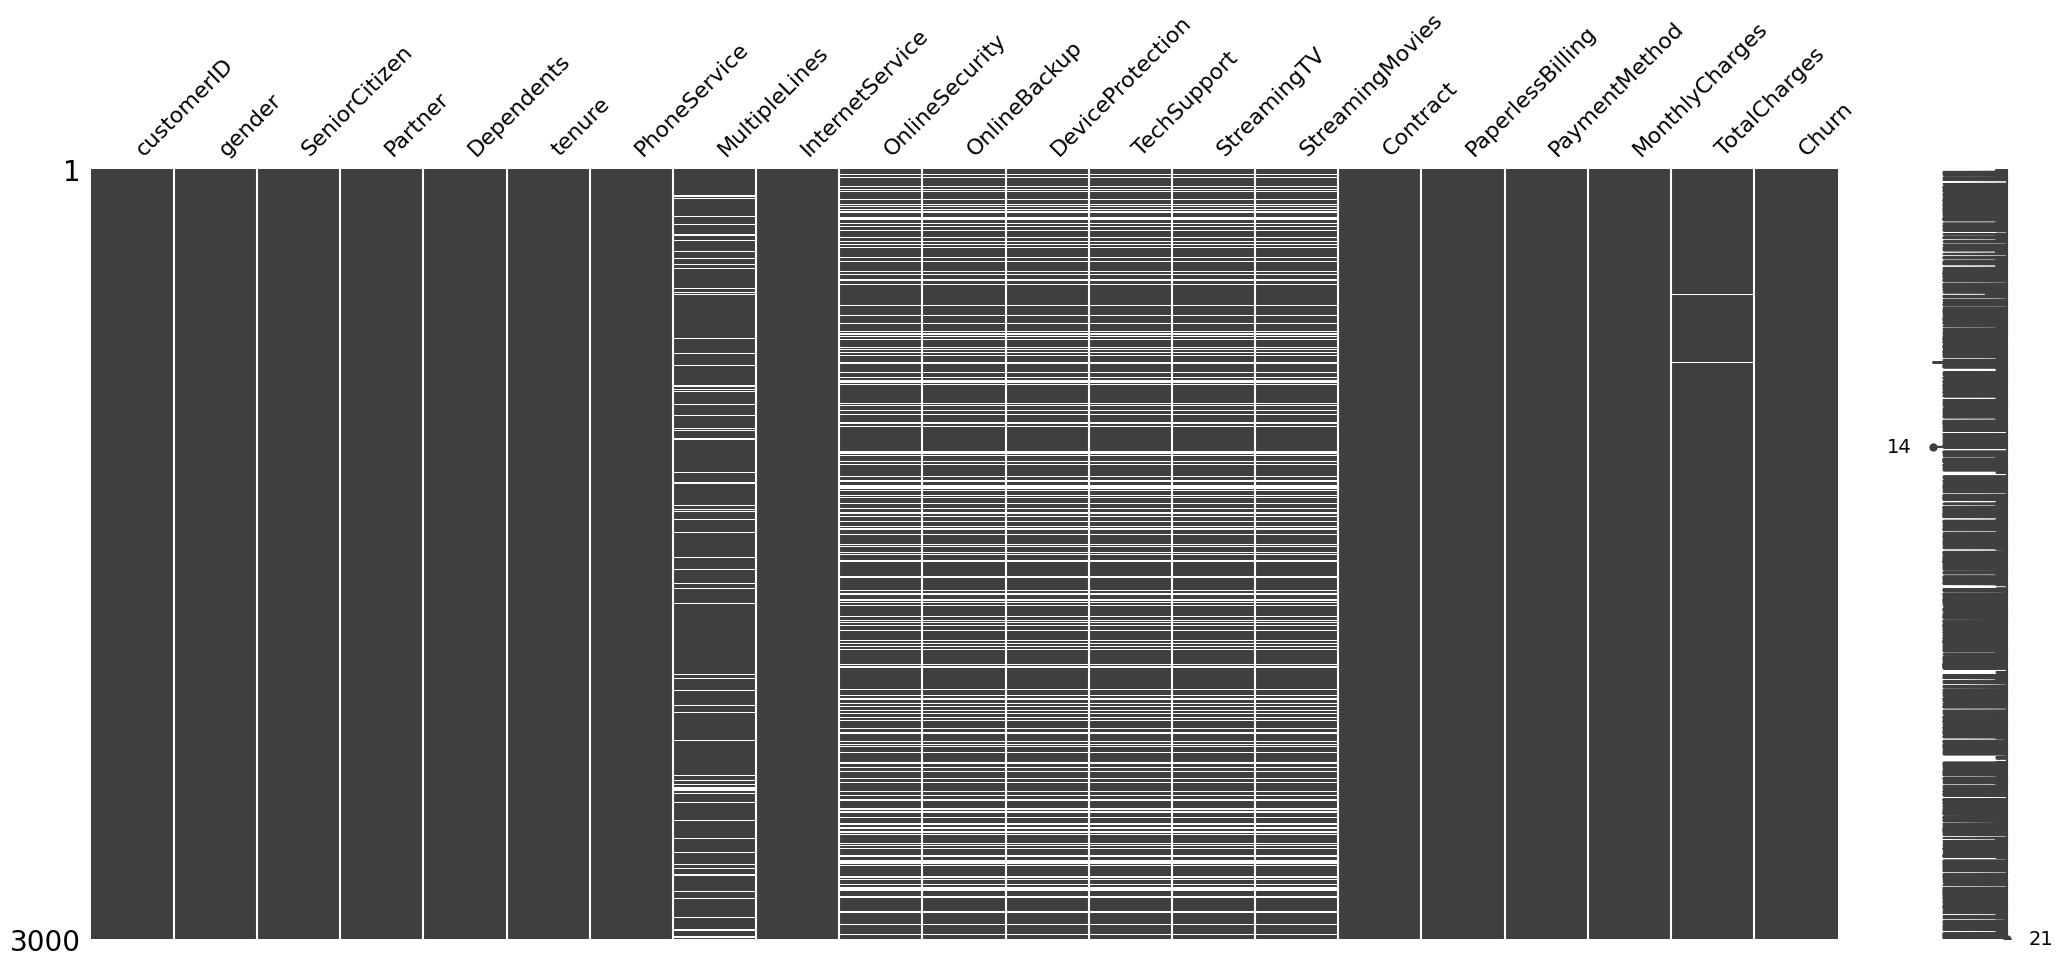

In [12]:
# Check for missing values in the first 3000 data points
check_missing_values(df_first)

Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


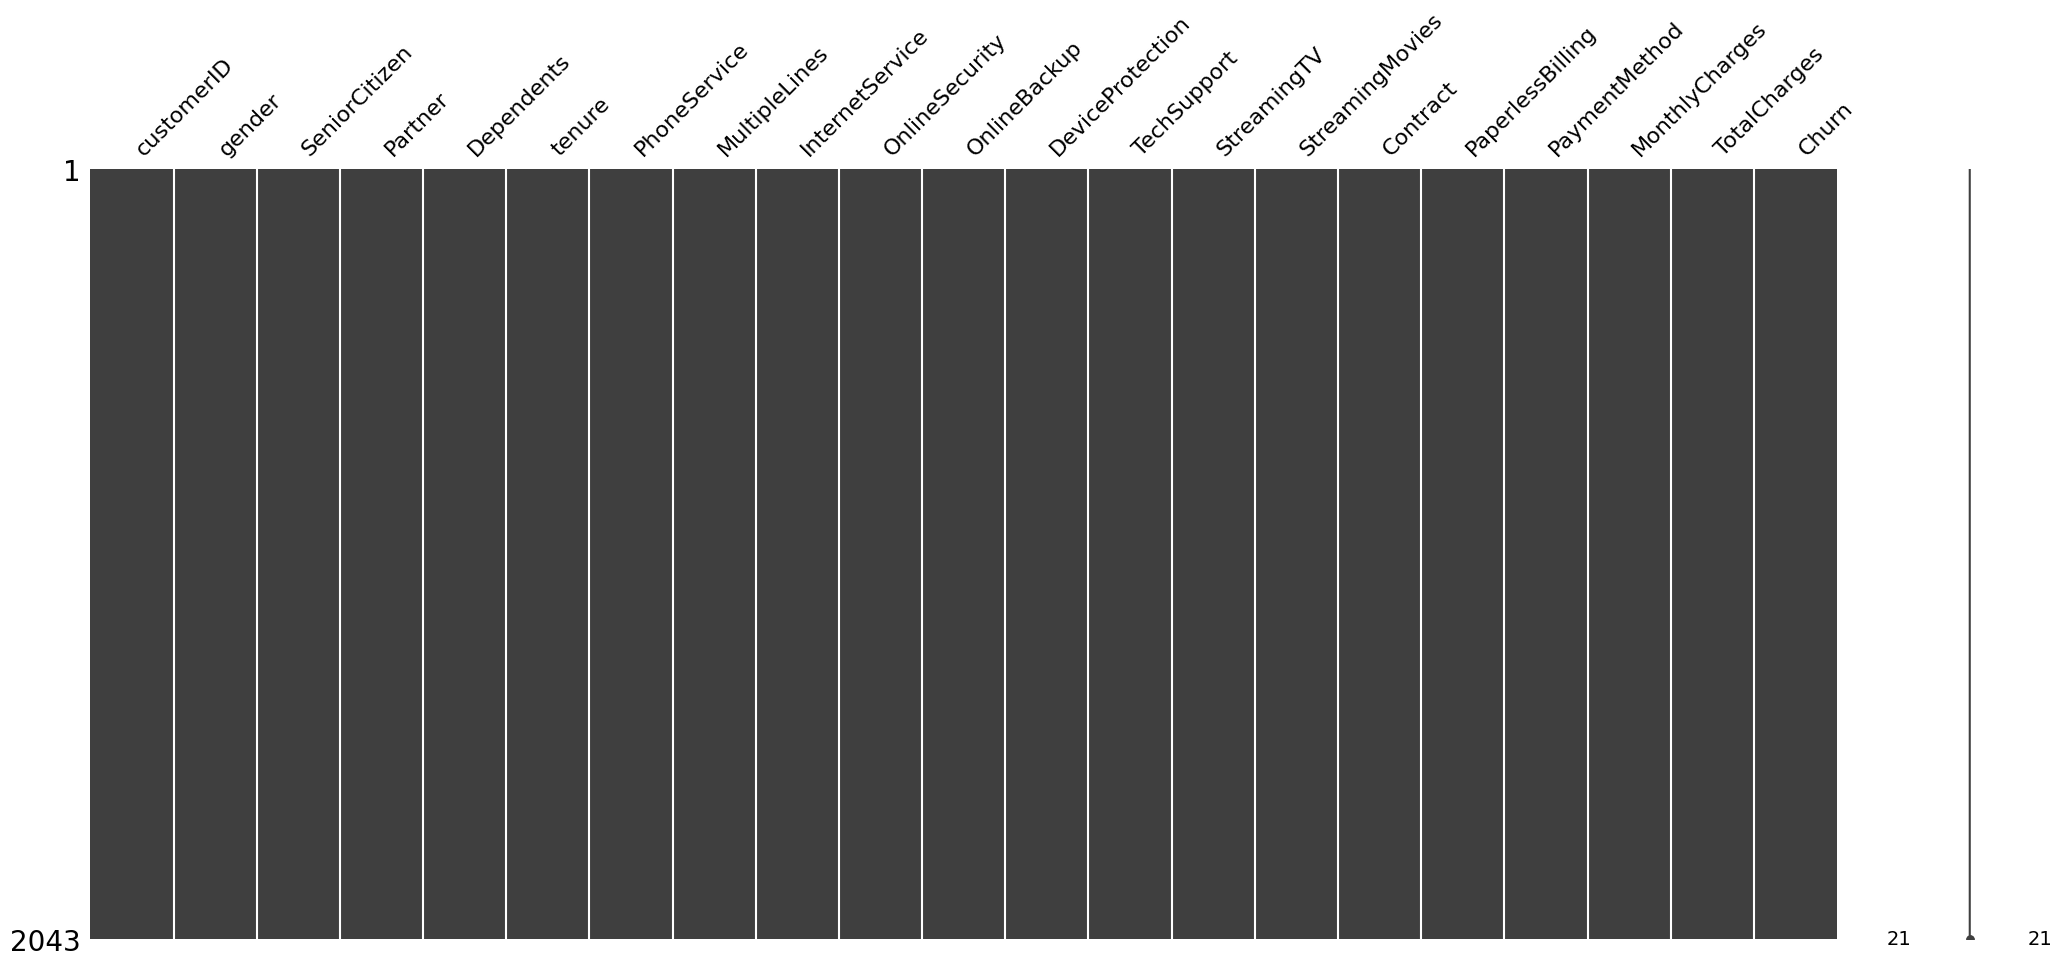

In [13]:
# Check for missing values in the second 2000 data points
check_missing_values(df_second)

Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


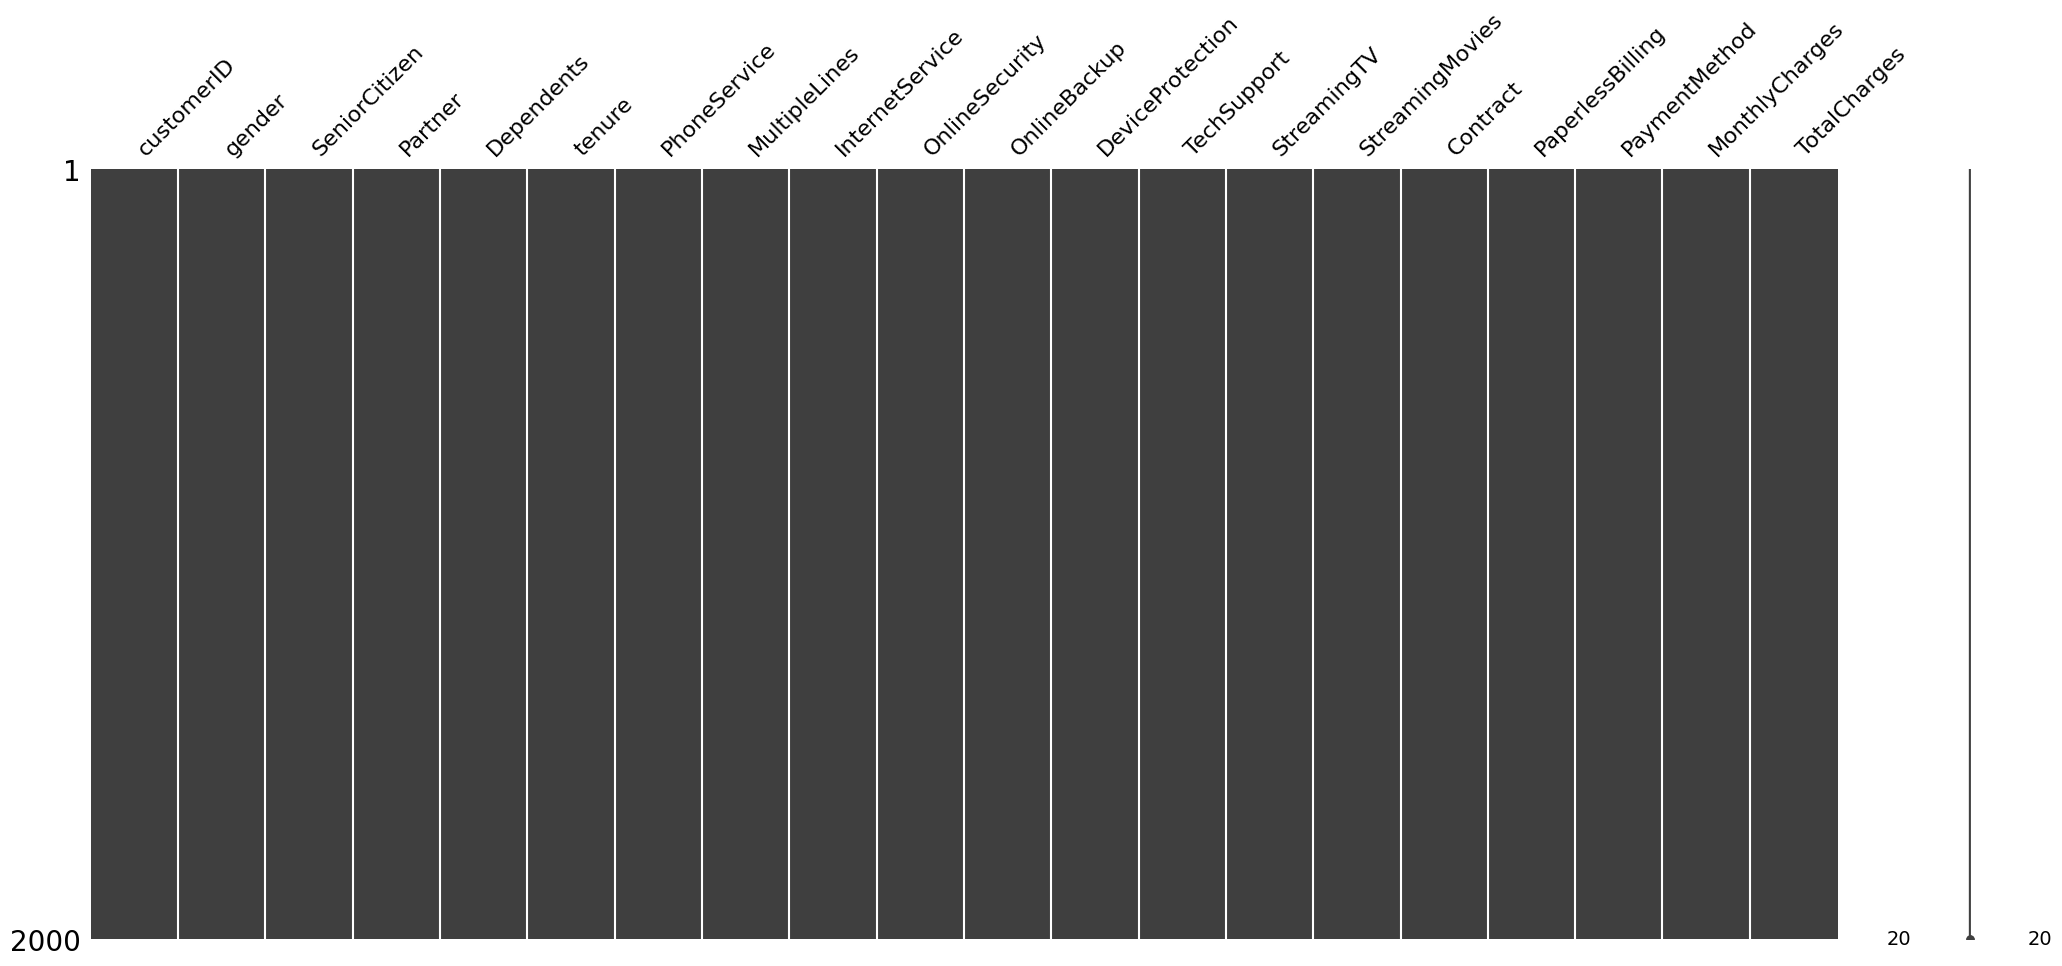

In [14]:
# Check for missing values in the second 2000 data points
check_missing_values(df_last)

### **Defining A Dictionary For Mapping Values**

In [15]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'OnlineSecurity': {True: 'Yes', False: 'No', None: 'No internet service'},
    'OnlineBackup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'DeviceProtection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'TechSupport': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingTV': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingMovies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'Churn': {True: 'Yes', False: 'No', None: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'},
    'SeniorCitizen': {True: 1, False: 0}  # Convert True to 1 and False to 0
}

# Use the replace method to map the categorical values in the DataFrame
df_first.replace(new_cat_values_mapping, inplace=True)

In [16]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [17]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [18]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
df_second['TotalCharges'] = pd.to_numeric(df_second['TotalCharges'], errors='coerce')

df_last['TotalCharges'] = pd.to_numeric(df_last['TotalCharges'], errors='coerce')

#### **Merging The Dataset:**

In [19]:
# Concatenate the rows from df_first with all rows from df_second to create the training dataset.
train = pd.concat([df_first, df_second])

# Create the test dataset for df_last.
test = df_last

### **Exploratory Data Analysis**

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [21]:
# Get more information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


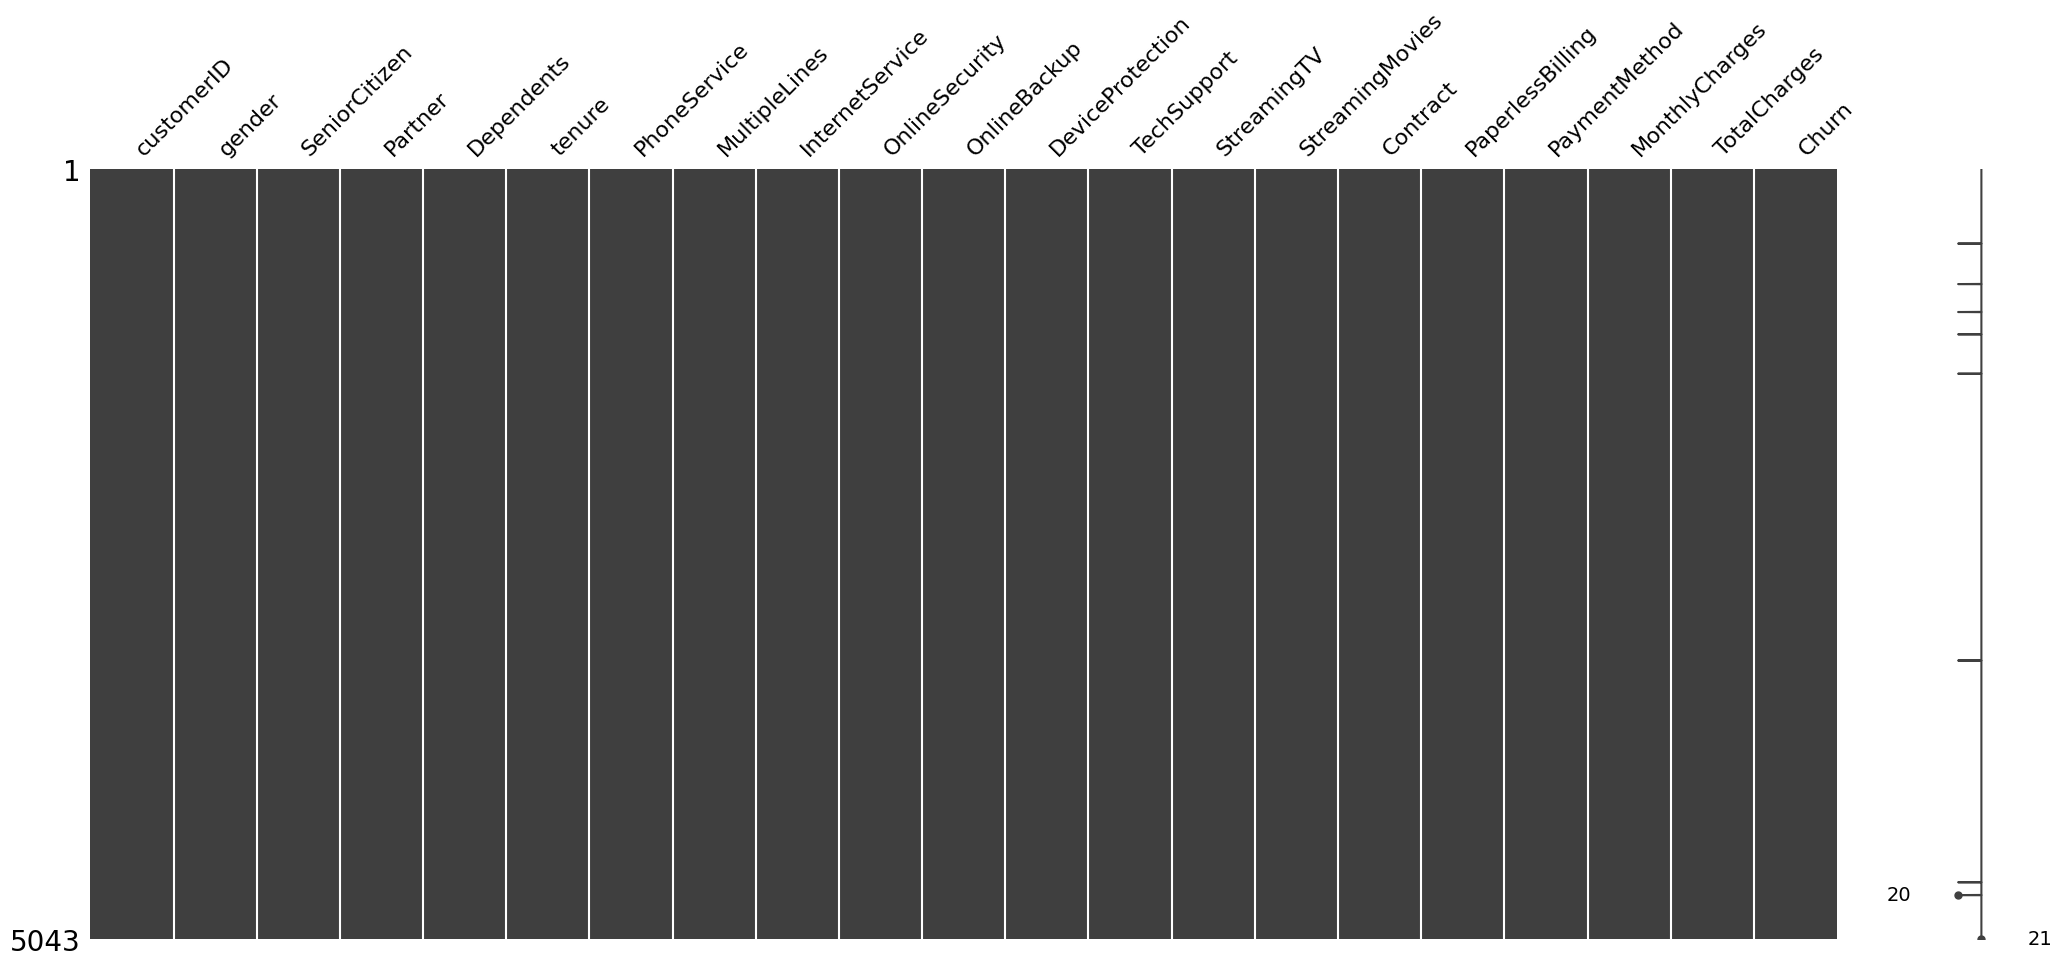

In [22]:
# Visualize the missing values in the train dataset
check_missing_values(train)

In [23]:
# Generate descriptive statistics of the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [24]:
train.describe(include = 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,3,No,2507
OnlineBackup,5043,3,No,2231
DeviceProtection,5043,3,No,2219


In [25]:
columns = train.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
for column in columns:
    print(f'{column}')
    unique_values = train[column].unique()
    print(f'There are {unique_values.size} unique values')
    print(f'{unique_values}')
    print('=' * 50)


customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
[0 1]
Partner
There are 2 unique values
['Yes' 'No']
Dependents
There are 2 unique values
['No' 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
['No' 'Yes']
MultipleLines
There are 3 unique values
['No phone service' 'No' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 3 unique values
['No' 'Yes' 'No internet service']
OnlineBackup
There are 3 unique values
['Yes' 'No' 'No internet service']
DeviceProtection
There are 3 unique values
['No' 'Yes' 'No internet service']
Te

In [27]:
# Identify duplicate indices
duplicate_indices = train.index[train.index.duplicated()]

# Print the duplicate indices
print("Duplicate indices:")
print(duplicate_indices)

# Reset the index to ensure unique indices
train = train.reset_index(drop=True)

# Check if the issue is resolved
print("Index after reset:")
print(train.index[train.index.duplicated()])


Duplicate indices:
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042],
      dtype='int64', length=2043)
Index after reset:
Index([], dtype='int64')


#### **Univariate Analysis**

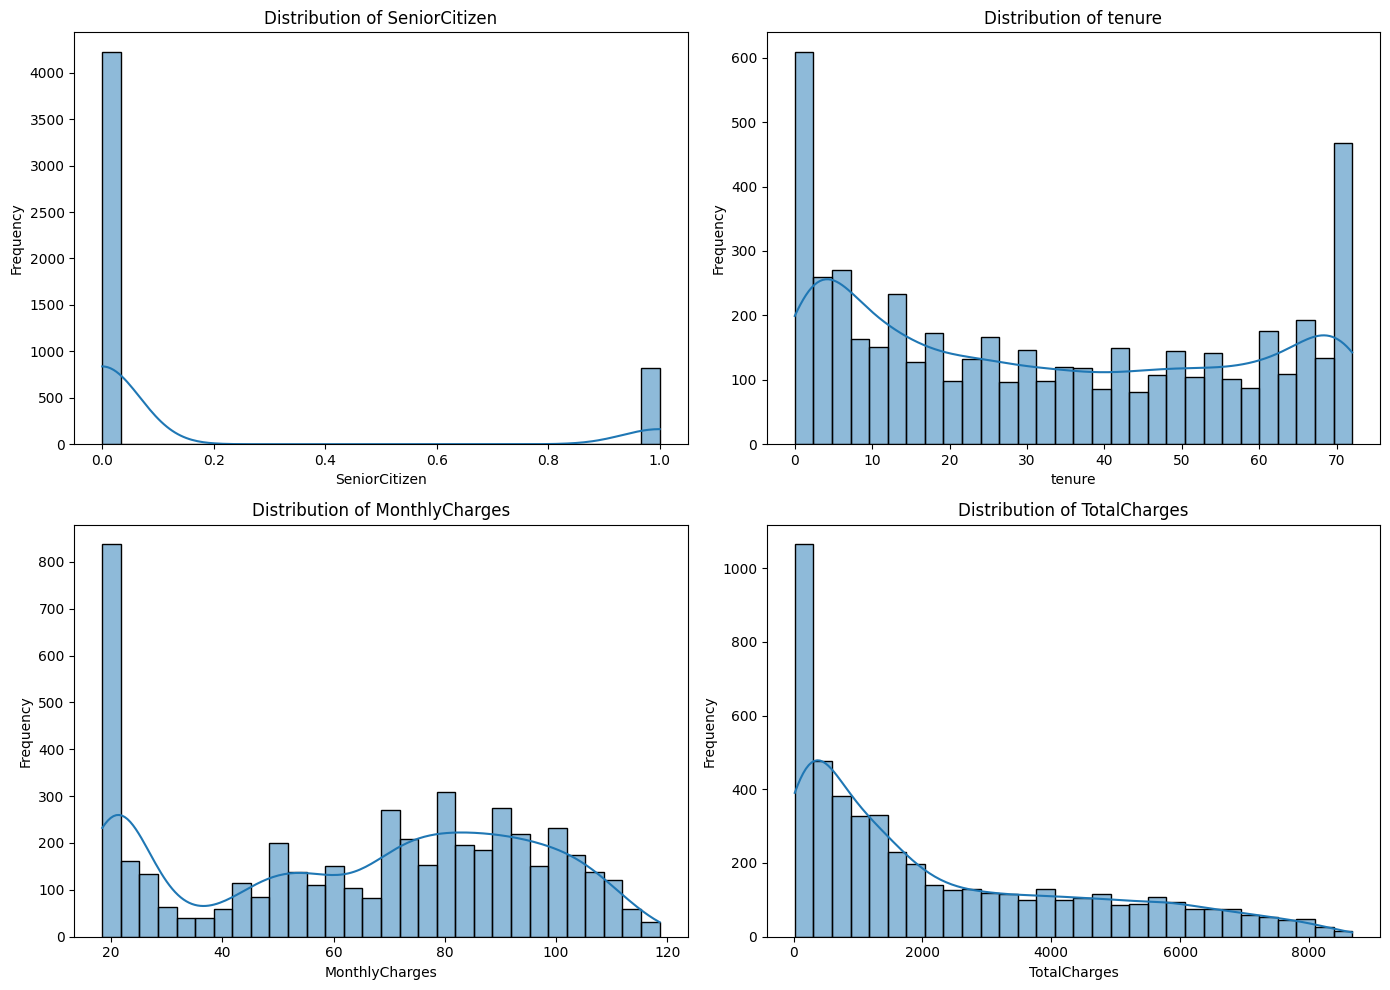

In [28]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.histplot(train[col].dropna(), kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


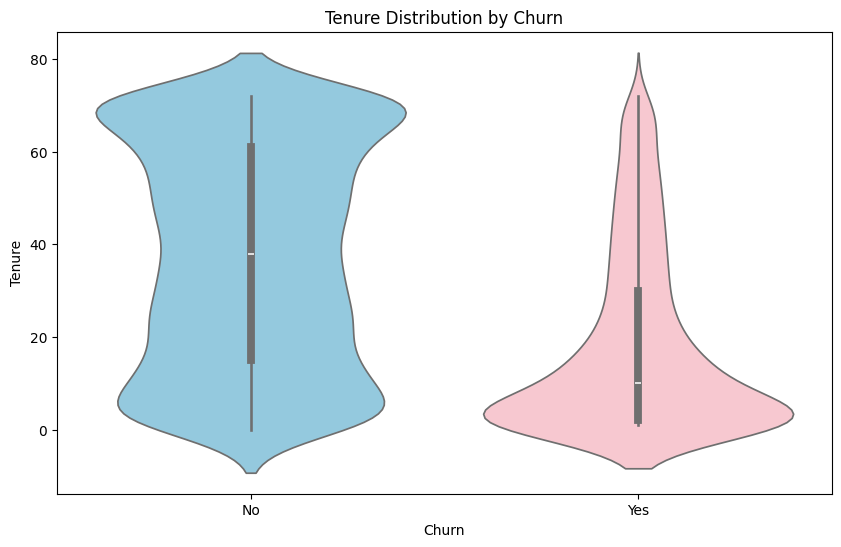

In [29]:
# Plotting a violin plot for Tenure by Churn
plt.figure(figsize=(10, 6))
sns.violinplot(data=train, x='Churn', y='tenure', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

#### **Bivariate Analysis**

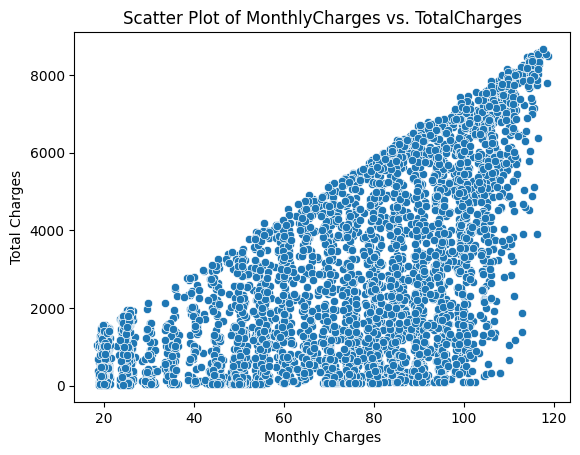

In [30]:
# Scatter plot between two numerical variables, e.g., 'MonthlyCharges' and 'TotalCharges'
sns.scatterplot(data=train, x='MonthlyCharges', y='TotalCharges')
plt.title('Scatter Plot of MonthlyCharges vs. TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


This plot shows the relationship between MonthlyCharges and TotalCharges. Since the points form an upward trend, it indicates that as MonthlyCharges increase, TotalCharges also tend to increase.



##### **Box Plot**

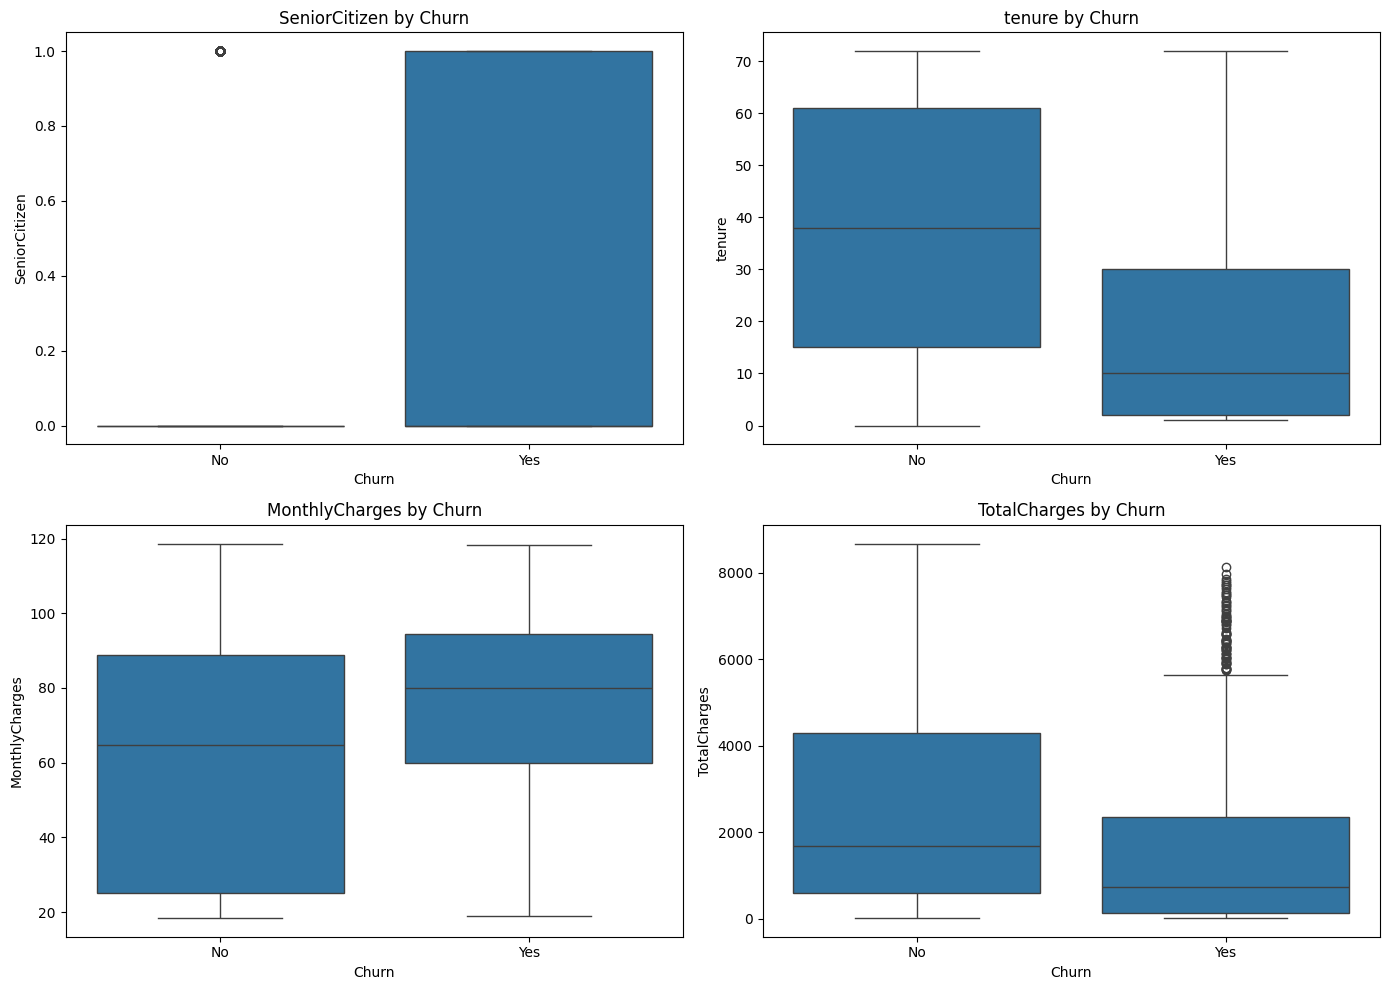

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=train, x='Churn', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


Senior Citizens: There is a higher proportion of senior citizens in the churn category.

Tenure: Customers with shorter tenures are more likely to churn.

Monthly Charges: Customers with higher monthly charges are more likely to churn.

Total Charges: Customers with higher total charges are more likely to churn.

##### **Bar Chart**

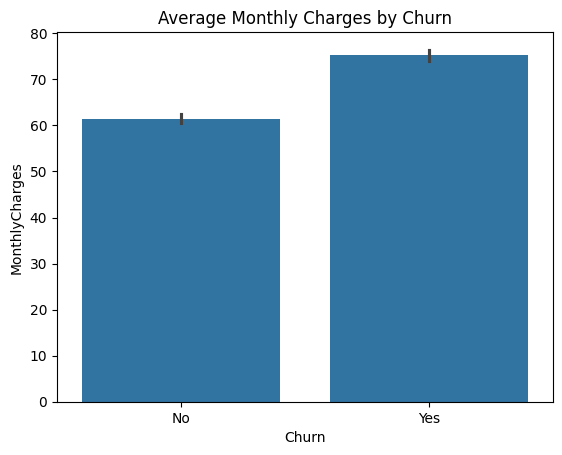

In [32]:
# Bar plot for categorical vs numerical variable
sns.barplot(data=train, x='Churn', y='MonthlyCharges')
plt.title('Average Monthly Charges by Churn')
plt.show()

This plot shows the average MonthlyCharges for customers who churned vs. those who did not. The graph shows that customers who churned tend to have higher MonthlyCharges.

##### **Correlation Matrix**

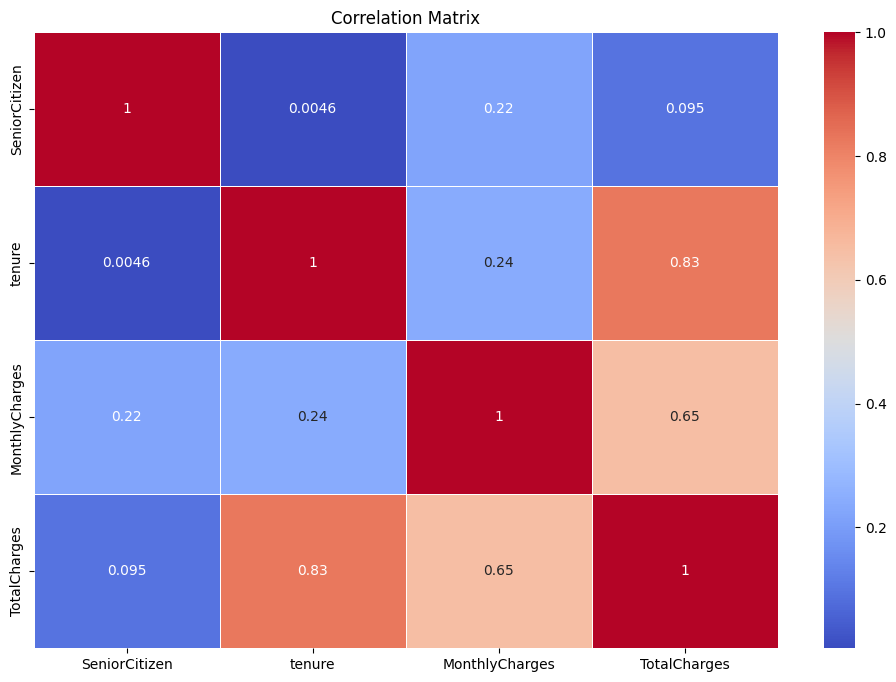

In [33]:
numeric_df = train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

SeniorCitizen:
Low correlations with other variables, indicating that being a senior citizen doesn't strongly correlate with tenure, monthly charges, or total charges.

tenure:
Shows a moderate positive correlation with MonthlyCharges (0.24) and a strong positive correlation with TotalCharges (0.83). This suggests that customers with longer tenure tend to have higher total charges.

MonthlyCharges:
Positively correlated with TotalCharges (0.65), indicating that higher monthly charges contribute significantly to higher total charges.

TotalCharges:
Strong correlations with tenure (0.83) and MonthlyCharges (0.65), affirming that total charges are influenced by both the duration of the customer's tenure and the amount they are charged monthly.

#### **Multivariate Analysis**

##### **Pair Plot**

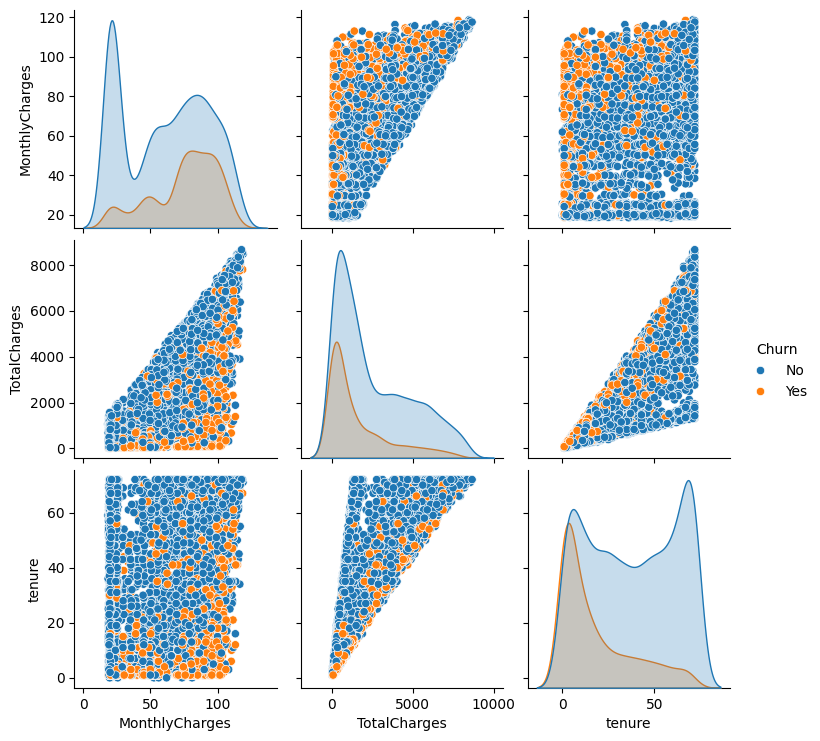

In [34]:
sns.pairplot(train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()


### **ANSWERING ANALYTICAL QUESTIONS**

1. Which customer demographics are most strongly associated with churn, and how do factors like age, gender, and senior citizenship status influence churn rates?

In [35]:
# Ensure the columns are correct in case there are discrepancies in naming conventions
train.columns = train.columns.str.strip()

# Group by gender and churn status to see the distribution
churn_by_gender = train.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
churn_by_gender

Churn,No,Yes
gender,,
Female,0.733897,0.266103
Male,0.736225,0.263775


In [36]:
# Group by SeniorCitizen status and churn
churn_by_senior = train.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
churn_by_senior


Churn,No,Yes
SeniorCitizen,,
0,0.764205,0.235795
1,0.584860,0.415140


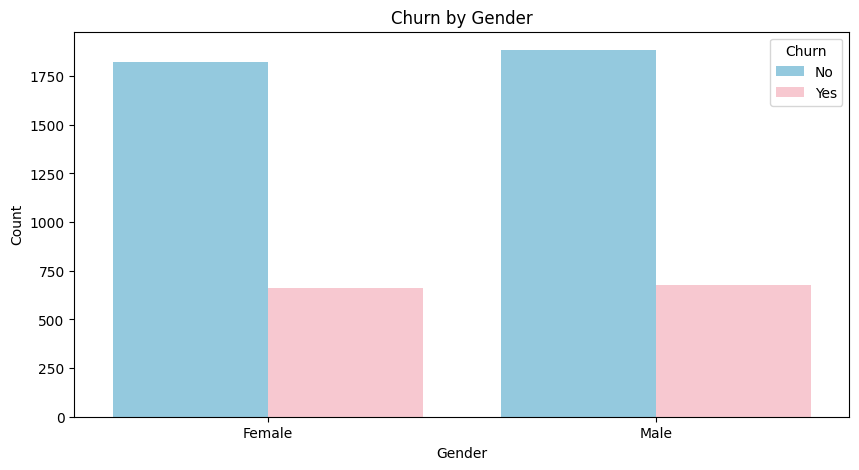

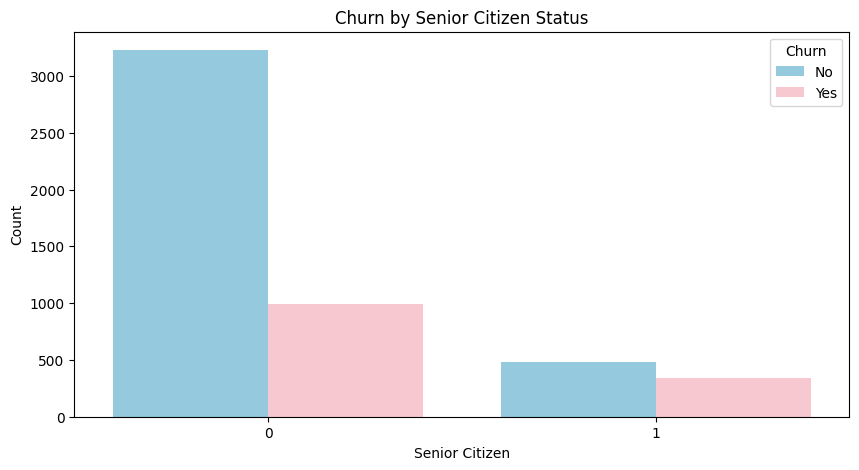

In [37]:
# Plotting churn by gender
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='gender', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# Plotting churn by senior citizen status
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='SeniorCitizen', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


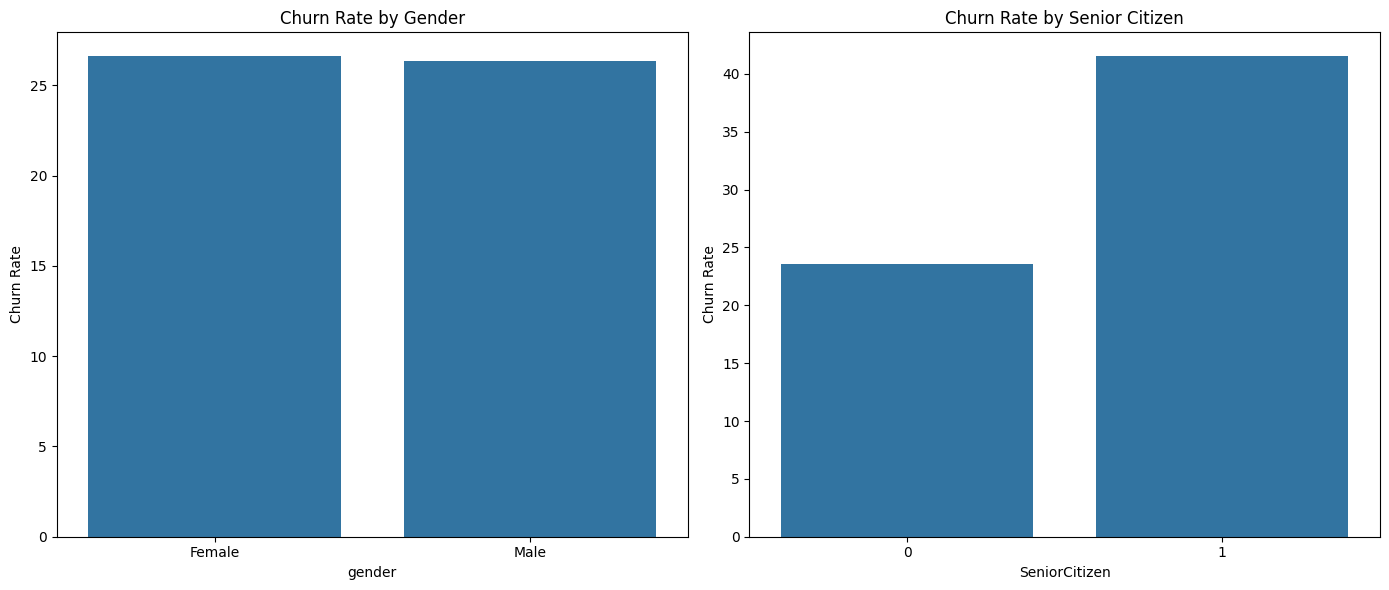

In [38]:
# Gender vs Churn
gender_churn = train.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn['Churn Rate'] = gender_churn['Yes'] * 100

# Senior Citizen vs Churn
senior_churn = train.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
senior_churn['Churn Rate'] = senior_churn['Yes'] * 100

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=gender_churn.index, y='Churn Rate', data=gender_churn, ax=axes[0])
sns.barplot(x=senior_churn.index, y='Churn Rate', data=senior_churn, ax=axes[1])
axes[0].set_title('Churn Rate by Gender')
axes[1].set_title('Churn Rate by Senior Citizen')
plt.tight_layout()
plt.show()


2. How does the duration of customer tenure influence the likelihood of churn, and is there a specific tenure period during which customers are more likely to leave?

In [39]:
# Group by tenure bins and churn
train['tenure_bins'] = pd.cut(train['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
churn_by_tenure = train.groupby('tenure_bins')['Churn'].value_counts(normalize=True).unstack()
churn_by_tenure


Churn,No,Yes
tenure_bins,,
0-12,0.522164,0.477836
13-24,0.706284,0.293716
25-36,0.794362,0.205638
37-48,0.806798,0.193202
49-60,0.852542,0.147458
61-72,0.932153,0.067847


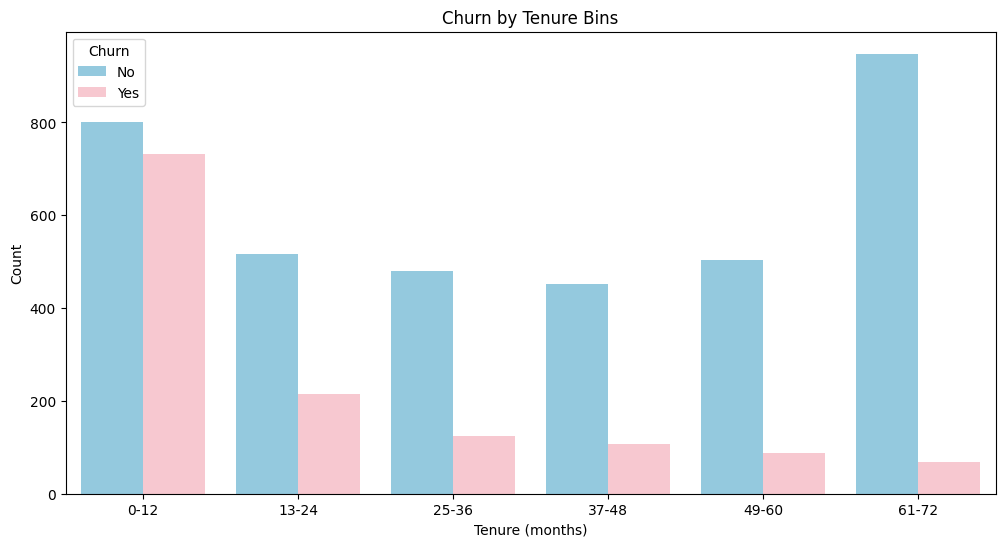

In [40]:
# Plotting churn by tenure bins
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='tenure_bins', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Tenure Bins')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


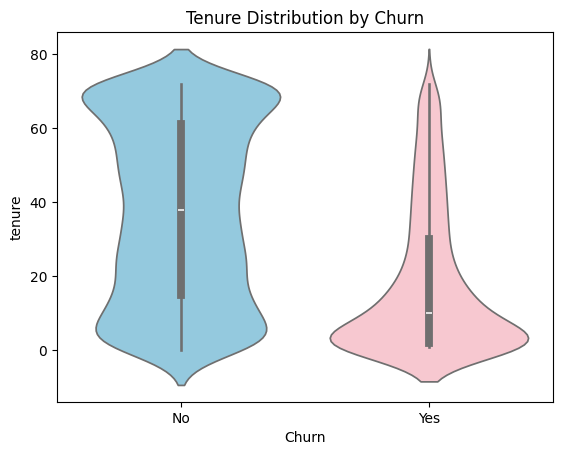

In [41]:
# Tenure vs Churn
sns.violinplot(data=train, x='Churn', y='tenure', palette={'Yes': 'pink', 'No': 'skyblue'})
plt.title('Tenure Distribution by Churn')
plt.show()


3. What is the impact of different service types (e.g., DSL, Fiber Optic, no internet service) on customer churn, and which services are most closely associated with higher churn rates?

In [42]:
# Group by InternetService type and churn
churn_by_internet_service = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_by_internet_service


Churn,No,Yes
InternetService,,
DSL,0.819825,0.180175
Fiber optic,0.576957,0.423043
No,0.929630,0.070370


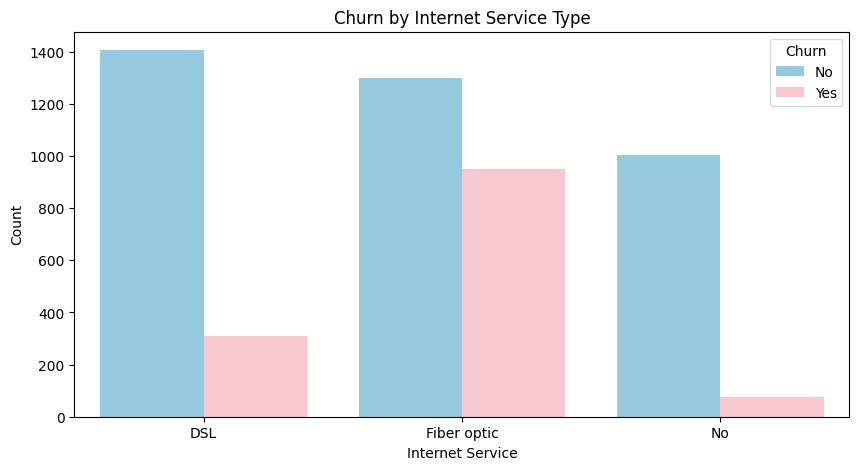

In [43]:
# Plotting churn by InternetService type
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='InternetService', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


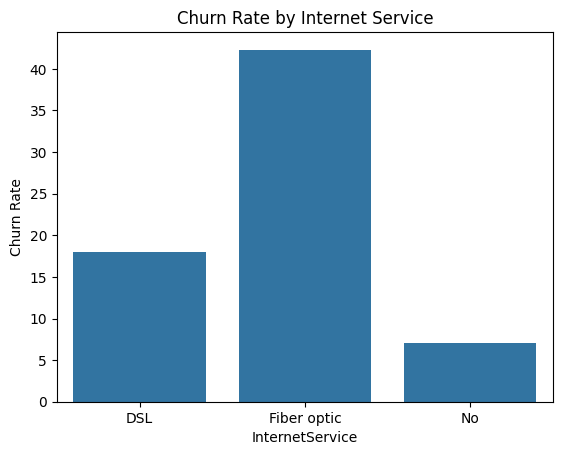

In [44]:
# Internet Service vs Churn
internet_churn = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
internet_churn['Churn Rate'] = internet_churn['Yes'] * 100

# Plotting
sns.barplot(x=internet_churn.index, y='Churn Rate', data=internet_churn)
plt.title('Churn Rate by Internet Service')
plt.show()


4. How do contract terms (e.g., month-to-month, one-year, two-year) and billing preferences (e.g., paperless billing) affect customer churn rates?

In [45]:
# Group by Contract type and churn
churn_by_contract = train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
churn_by_contract

Churn,No,Yes
Contract,,
Month-to-month,0.568513,0.431487
One year,0.884360,0.115640
Two year,0.975884,0.024116


In [46]:
# Group by PaperlessBilling and churn
churn_by_paperless = train.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
churn_by_paperless


Churn,No,Yes
PaperlessBilling,,
No,0.838300,0.161700
Yes,0.664553,0.335447


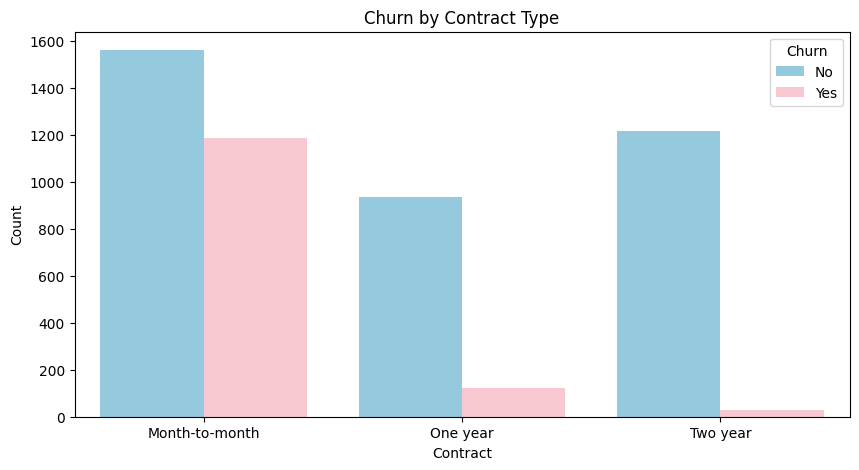

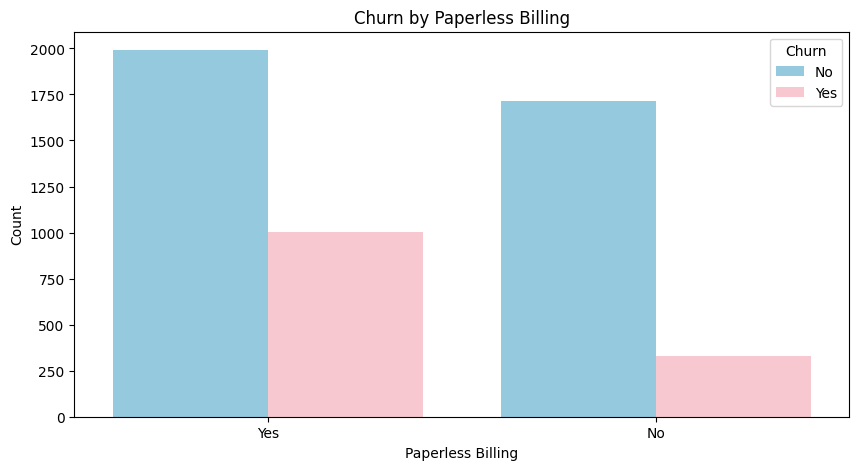

In [47]:
# Plotting churn by Contract type
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Contract', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# Plotting churn by PaperlessBilling
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='PaperlessBilling', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


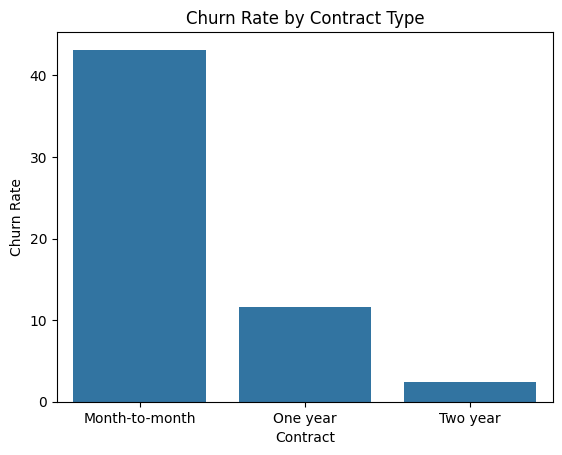

In [48]:
# Contract vs Churn
contract_churn = train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn['Churn Rate'] = contract_churn['Yes'] * 100

# Plotting
sns.barplot(x=contract_churn.index, y='Churn Rate', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.show()


5. What role do additional services (e.g., online security, tech support, streaming TV, streaming movies) play in influencing customer churn, and which of these services are most effective in retaining customers?

In [49]:
# List of additional services to analyze
additional_services = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through each service and calculate churn rates
for service in additional_services:
    churn_by_service = train.groupby(service)['Churn'].value_counts(normalize=True).unstack()
    print(churn_by_service)


Churn                      No       Yes
OnlineSecurity                         
No                   0.582768  0.417232
No internet service  0.929630  0.070370
Yes                  0.853022  0.146978
Churn                      No       Yes
TechSupport                            
No                   0.579693  0.420307
No internet service  0.929630  0.070370
Yes                  0.851777  0.148223
Churn                      No       Yes
StreamingTV                            
No                   0.665510  0.334490
No internet service  0.929630  0.070370
Yes                  0.699229  0.300771
Churn                      No       Yes
StreamingMovies                        
No                   0.669864  0.330136
No internet service  0.929630  0.070370
Yes                  0.694248  0.305752


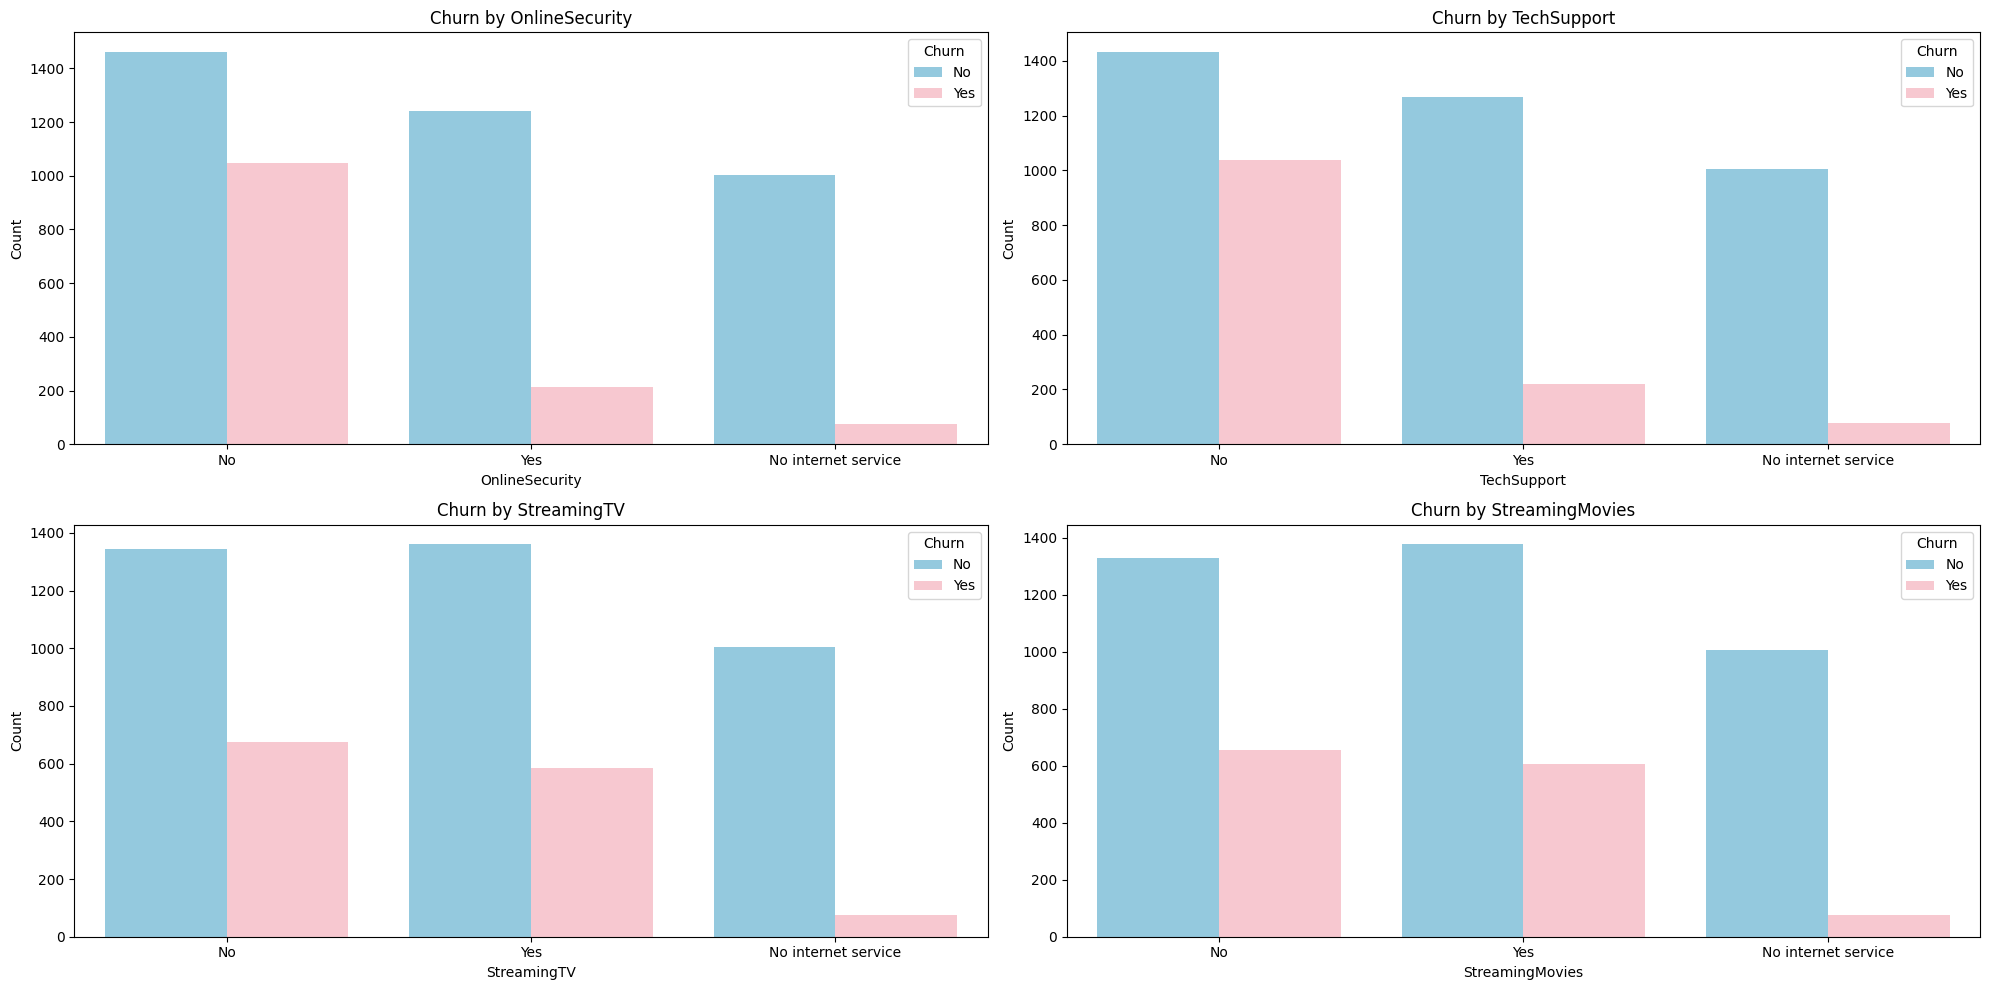

In [50]:
# Plotting churn by additional services
plt.figure(figsize=(20, 10))
for i, service in enumerate(additional_services, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train, x=service, hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()


OnlineSecurity vs. Churn:
Customers with no OnlineSecurity have a higher churn rate compared to those with OnlineSecurity.
Those who don't use internet services have a very low churn rate.

TechSupport vs. Churn:
Customers without TechSupport have a higher churn rate compared to those with TechSupport.
Similar to OnlineSecurity, customers without internet service have a low churn rate.

StreamingTV vs. Churn:
The churn rate is higher among customers who do not use StreamingTV compared to those who do.
Again, customers without internet service show low churn rates.

StreamingMovies vs. Churn:
The churn rate is higher among customers who do not use StreamingMovies compared to those who do.
Customers without internet service maintain a low churn rate.

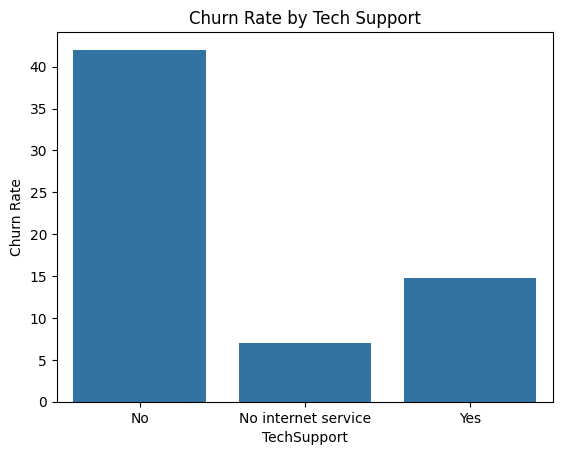

In [51]:
# Tech Support vs Churn
techsupport_churn = train.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
techsupport_churn['Churn Rate'] = techsupport_churn['Yes'] * 100

# Plotting
sns.barplot(x=techsupport_churn.index, y='Churn Rate', data=techsupport_churn)
plt.title('Churn Rate by Tech Support')
plt.show()


### `HYPOTHESIS TESTING`

##### **Null Hypothesis:** The monthly subscription cost (MonthlyCharges) has no significant effect on customer churn (Churn) from the Vodafone network service.


##### **Alternate Hypothesis:** The monthly subscription cost (MonthlyCharges) has a significant effect on customer churn (Churn) from the Vodafone network service.

In [52]:
# Separate the independent Monthly Charges between the two groups
churn_yes = train[train['Churn'] == "Yes"]['MonthlyCharges']
churn_no = train[train['Churn'] == "No"]['MonthlyCharges']

# Perform the independent samples t-test (assuming equal variance)
t_statistic, p_value = stats.ttest_ind(churn_yes, churn_no)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the p-value is less than alpha to determine the significance
if p_value < alpha:
    print("Reject the null hypothesis: MonthlyCharges have a significant effect on churn.")
else:
    print("Fail to reject the null hypothesis: MonthlyCharges do not have a significant effect on churn.")


T-Statistic: 14.650610568422312
P-Value: 1.257546511354579e-47
Reject the null hypothesis: MonthlyCharges have a significant effect on churn.


##### **Other Columns**

Chi-square test for gender: p-value = 0.8765122032778316
The relationship between gender and churn is not statistically significant.

Chi-square test for SeniorCitizen: p-value = 2.9422590466795336e-26
The relationship between SeniorCitizen and churn is statistically significant.

Chi-square test for InternetService: p-value = 1.0245434346853363e-122
The relationship between InternetService and churn is statistically significant.



Chi-square test for Contract: p-value = 2.86119415951209e-192
The relationship between Contract and churn is statistically significant.

Chi-square test for TechSupport: p-value = 1.6664192203828545e-135
The relationship between TechSupport and churn is statistically significant.



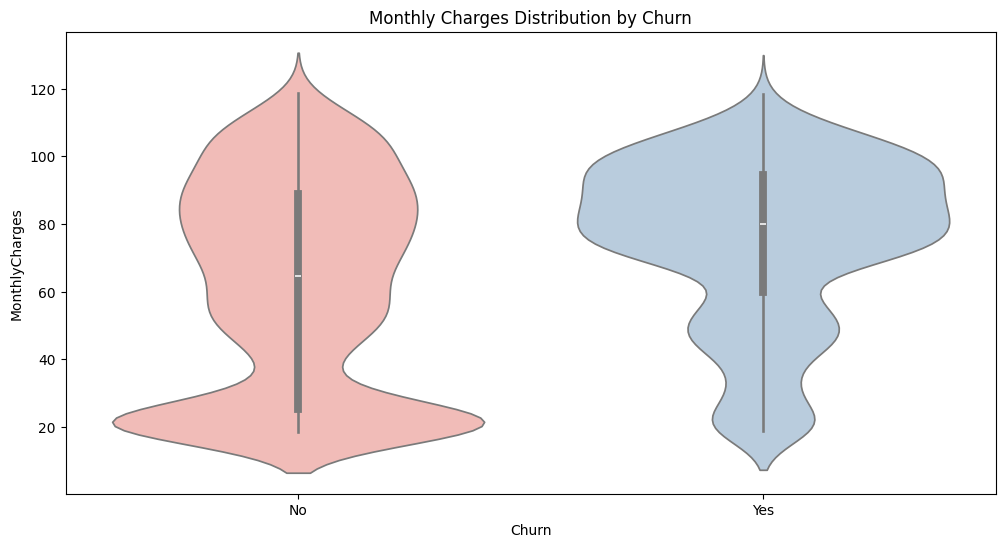

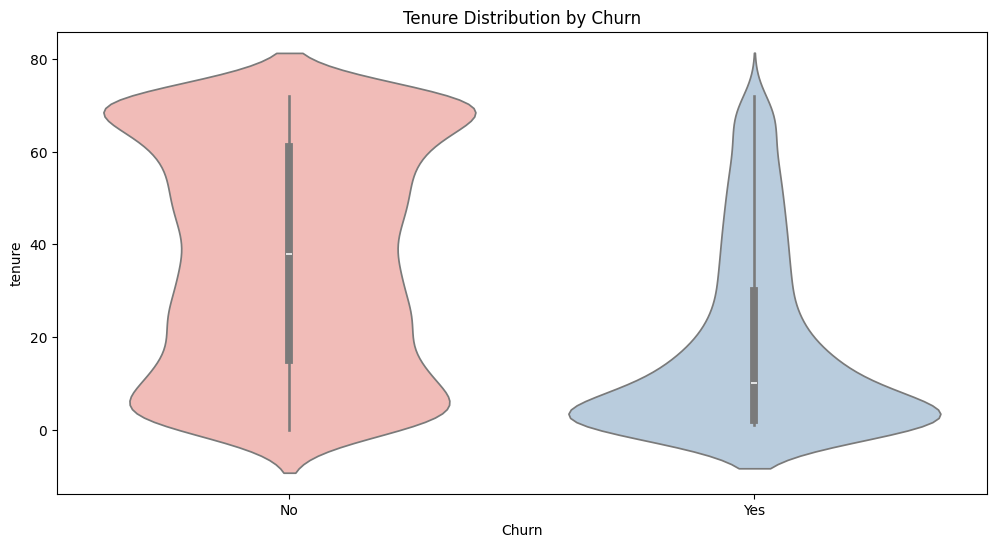

In [53]:
# Function to perform Chi-square test for each relevant categorical variable
def chi_square_test(variable):
    contingency_table = pd.crosstab(train[variable], train['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return p

# List of categorical variables to test
categorical_variables = ['gender', 'SeniorCitizen', 'InternetService', 'Contract', 'TechSupport']

# Perform the Chi-square test for each variable and print the p-values
for variable in categorical_variables:
    p_value = chi_square_test(variable)
    print(f"Chi-square test for {variable}: p-value = {p_value}")

    if p_value < 0.05:
        print(f"The relationship between {variable} and churn is statistically significant.\n")
    else:
        print(f"The relationship between {variable} and churn is not statistically significant.\n")

# Visualization (Violin plots for visual understanding)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=train, palette='Pastel1')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Churn', y='tenure', data=train, palette='Pastel1')
plt.title('Tenure Distribution by Churn')
plt.show()


### `DATA PREPARATION`

In [54]:
# Convert 'SeniorCitizen' to object type to avoid numeric encoding (if not already done)
train['SeniorCitizen'] = train['SeniorCitizen'].astype('object')

# Drop the target column 'Churn' to create the feature matrix 'X'
x = train.drop('Churn', axis=1)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,0-12


In [55]:
# Assign the target column 'Churn' to the target vector 'y'
y = train['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [56]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5043 entries, 0 to 5042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
5043 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [57]:
# Random code to check those who churn and those who didnt
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

##### **Split Data Into Columns**

In [58]:
# Select numerical columns
numerical_columns = x.select_dtypes(include=['number']).columns
numerical_columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [59]:
# Select categorical columns
categorical_columns = x.select_dtypes(include=['object']).columns
categorical_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [60]:
y.value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

##### **Splitting the X and Y (Into 4 more Parts)**

In [61]:
train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

[      customerID  gender SeniorCitizen Partner Dependents  tenure  \
 2175  7927-AUXBZ  Female             0      No         No      30   
 4022  5025-GOOKI  Female             0      No         No      20   
 1460  2952-QAYZF    Male             0      No         No       5   
 2322  1306-RPWXZ  Female             0      No        Yes      49   
 2349  9548-ZMVTX    Male             0     Yes        Yes      72   
 ...          ...     ...           ...     ...        ...     ...   
 3282  3049-SOLAY  Female             0     Yes         No       3   
 3432  1597-FZREH  Female             0      No         No       2   
 3019  3320-VEOYC    Male             1      No         No      14   
 2876  6746-WAUWT    Male             0      No         No      19   
 31    4929-XIHVW    Male             1     Yes         No       2   
 
      PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
 2175          Yes            No     Fiber optic                   No  ...   
 4

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

##### **Instatiating A Class**

In [63]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


##### **Create A Pipeline**

In [64]:
# Create pipelines for numerical and categorical data preprocessing
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('power_transformation', PowerTransformer(method='yeo-johnson'))
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])



# Combine the numerical and categorical pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', numerical_pipeline, numerical_columns),
        ('cat_pipeline', categorical_pipeline, categorical_columns)
    ])


In [65]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power_transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

## `Modelling & Evaluation`

In [66]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
]




#### **Training The Model**

In [67]:
for model_name, classifier in models:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train,y_train_encoded)
    

    y_pred = pipeline.predict(X_test)

    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print('=' *60)

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       742
           1       0.56      0.58      0.57       267

    accuracy                           0.77      1009
   macro avg       0.70      0.71      0.71      1009
weighted avg       0.77      0.77      0.77      1009

SVC
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       742
           1       0.66      0.53      0.59       267

    accuracy                           0.80      1009
   macro avg       0.75      0.71      0.73      1009
weighted avg       0.79      0.80      0.80      1009

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.63      0.50      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.

#### **Train on Unbalanced Data**

In [68]:
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline = {}

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    acccuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, acccuracy, precision, recall, f1_score]


unbalanced_metrics.sort_values(by='F1_Score',ascending=False)

,Model_name,Accuracy,Precision,Recall,F1_Score
1,SVC,0.802775,0.793182,0.802775,0.795310
3,Logistic Regression,0.798811,0.793001,0.798811,0.795251
2,Random Forest Classifier,0.789891,0.778984,0.789891,0.781761
0,Decision Tree,0.769078,0.772207,0.769078,0.770546


#### **Train on Balanced Data -- RandomOverSampler**

In [69]:
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline = {}

for model_name, classifier in models:

    pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('over-sampler', RandomOverSampler(random_state=42)),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    balanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    acccuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    balanced_metrics.loc[len(balanced_metrics)] = [model_name, acccuracy, precision, recall, f1_score]


balanced_metrics.sort_values(by='F1_Score',ascending=False)

,Model_name,Accuracy,Precision,Recall,F1_Score
2,Random Forest Classifier,0.781962,0.786346,0.781962,0.783946
3,Logistic Regression,0.766105,0.796844,0.766105,0.775422
0,Decision Tree,0.761150,0.776010,0.761150,0.766905
1,SVC,0.743310,0.796165,0.743310,0.756461


#### **Train on Balanced Data -- SMOTE**

In [70]:
smote_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline = {}

for model_name, classifier in models:

    pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    balanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    acccuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    smote_metrics.loc[len(smote_metrics)] = [model_name, acccuracy, precision, recall, f1_score]


smote_metrics.sort_values(by='F1_Score',ascending=False)

,Model_name,Accuracy,Precision,Recall,F1_Score
2,Random Forest Classifier,0.798811,0.797168,0.798811,0.797947
3,Logistic Regression,0.767096,0.798185,0.767096,0.776444
0,Decision Tree,0.768087,0.775777,0.768087,0.771403
1,SVC,0.740337,0.796746,0.740337,0.753960


#### **Feature Importance And Selection**

In [71]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_metrics  = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipelines = {}

for model_name, classifier in models:

    pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_metrics .loc[len(fi_smote_metrics)] = [model_name, acccuracy, precision, recall, f1_score]


fi_smote_metrics.sort_values(by='F1_Score',ascending=False)

,Model_name,Accuracy,Precision,Recall,F1_Score
2,Random Forest Classifier,0.798811,0.797168,0.798811,0.797947
3,Logistic Regression,0.767096,0.798185,0.767096,0.776444
0,Decision Tree,0.768087,0.775777,0.768087,0.771403
1,SVC,0.740337,0.796746,0.740337,0.753960


In [72]:
all_pipelines

{'Decision Tree': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeline',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    RobustScaler()),
                                                                   ('power_transformation',
                                                                    PowerTransformer())]),
                                                   Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('cat_pipeline',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(s

## `Visualize ROC Curve`

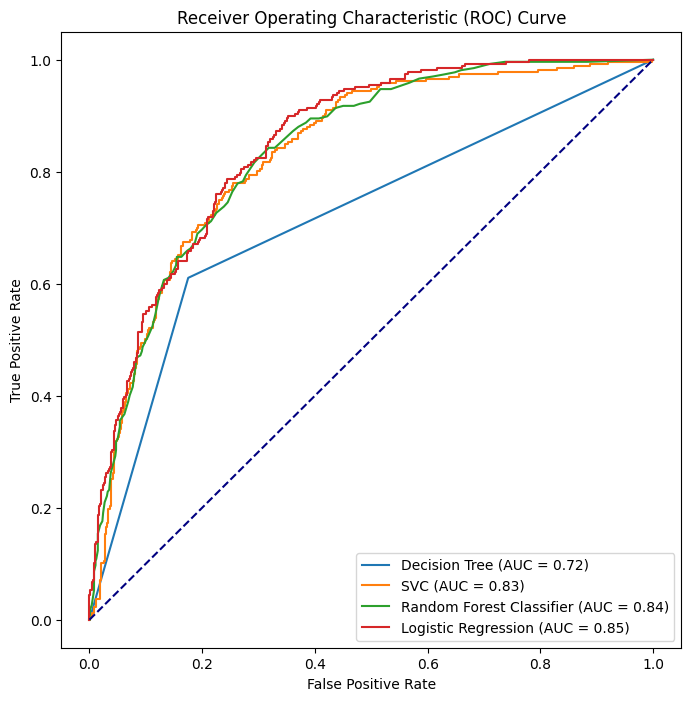

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}

for model_name, pipeline in all_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positve Rate': fpr, 'True Positve Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

In [74]:
pd.set_option('display.max_rows', None)
roc_curve_data['Random Forest Classifier']

,False Positve Rate,True Positve Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.97
2,0.001348,0.018727,0.96
3,0.004043,0.026217,0.95
4,0.008086,0.052434,0.94
5,0.008086,0.086142,0.93
6,0.010782,0.097378,0.92
7,0.010782,0.104869,0.91
8,0.012129,0.108614,0.90
9,0.014825,0.123596,0.88


In [75]:
forest_pipeline = all_pipelines['Random Forest Classifier']

forest_y_pred = forest_pipeline.predict(X_test)

matrix = confusion_matrix(y_test_encoded, forest_y_pred)
matrix

array([[644,  98],
       [105, 162]], dtype=int64)

<Axes: >

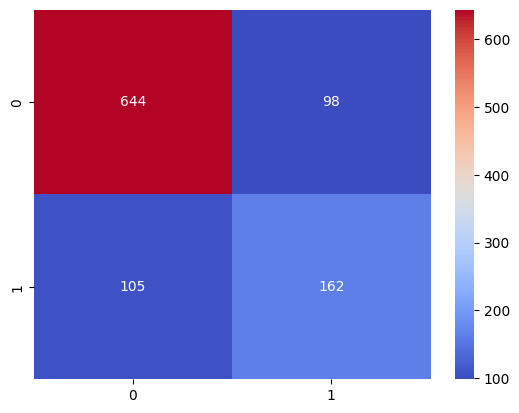

In [76]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

In [77]:
threshold = 0.18

y_pred_proba = forest_pipeline.predict_proba(X_test)[:, 1]

binary_prediction = (y_pred_proba >= threshold)

threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)
threshold_matrix

array([[408, 334],
       [ 22, 245]], dtype=int64)

<Axes: >

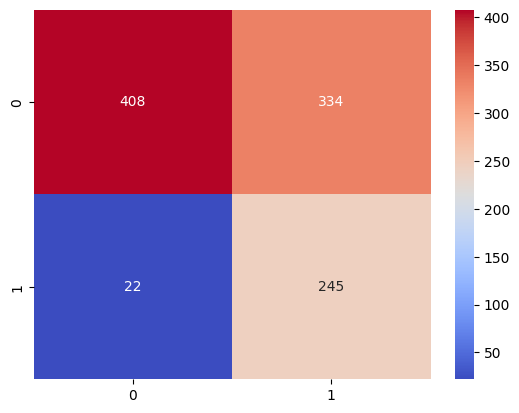

In [78]:
sns.heatmap(data=threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

#### **Hyperparameter Tuning**

In [79]:
param_grid = {
    'feature_importance__k': ['all'], 
    'classifier__n_estimators': [5, 4, 7, 20],
    'classifier__max_depth': [None, 3, 2],
    'classifier__min_samples_split': [2, 6]
}

grid_search = GridSearchCV(
    forest_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1')

grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power_transformation',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imput...
                                       ('smote', SMOTE(random_state=42)),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000017CE77E0220>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 3, 2],
                         'classifier__min_samples_split': [2, 6],
                         'classifier__n_estimators': [5, 4, 7, 20],
                         'feature_importance__k': ['all']},
             scoring='f1')

In [80]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='...
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000017CE77E0220>)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=20,
                                        random_state=42))])

In [81]:
best_parameters = grid_search.best_params_
best_parameters

{'classifier__max_depth': 3,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 20,
 'feature_importance__k': 'all'}

#### **Retrain Model On Best Parameters**

In [82]:
forest_pipeline.set_params(**best_parameters)
forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='...
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000017CE77E0220>)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=20,
                                        random_state=42))])

#### **Logistic Regression**

In [83]:
pd.set_option('display.max_rows', None)
roc_curve_data['Logistic Regression']

,False Positve Rate,True Positve Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.957112
2,0.000000,0.044944,0.933315
3,0.001348,0.044944,0.930184
4,0.001348,0.052434,0.924879
5,0.004043,0.052434,0.922721
6,0.004043,0.063670,0.920888
7,0.005391,0.063670,0.920221
8,0.005391,0.067416,0.920108
9,0.006739,0.067416,0.919711


In [84]:
logistic_pipeline = all_pipelines['Logistic Regression']

logistic_y_pred = logistic_pipeline.predict(X_test)

matrix = confusion_matrix(y_test_encoded, forest_y_pred)
matrix

array([[644,  98],
       [105, 162]], dtype=int64)

<Axes: >

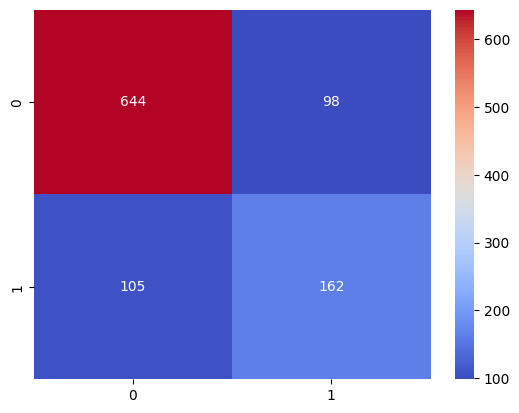

In [85]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

In [86]:

threshold =0.282866

y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

binary_prediction = (y_pred_proba >= threshold)

threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)
threshold_matrix

array([[467, 275],
       [ 25, 242]], dtype=int64)

<Axes: >

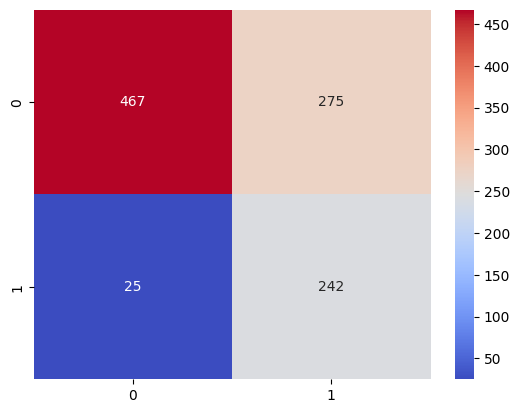

In [87]:
sns.heatmap(data=threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

#### **Hyperparameter tuning for Logistic Regression**

In [88]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(
    logistic_pipeline,
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1'
)

grid_search_lr.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power_transformation',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imput...
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('feature_importance',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000017CE77E0220>)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [89]:
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

#### **Retrain On Best Parameters**

In [90]:
logistic_pipeline.set_params(**best_params_lr)
logistic_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='...
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000017CE77E0220>)),
                ('classifier', LogisticRegression(C=1, random_state=42))])

In [91]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [92]:
predictions = best_model.predict(test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [93]:
encoder.inverse_transform(predictions)

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [94]:
train.to_csv('train.csv', index=False)


#### Key Insights


1. For the columns where values are represented differently (0 and False, No and True, etc.), I will standardize them to a consistent format across both datasets
5. There are no duplicated values in the combined dataset
6. Dataset is not evenly distributed
8. The dataset has outliers in the `Total Charges by Churn`